In [1]:
import os
import time
import numpy as np

import matplotlib.pyplot as plt

from model import *

import json

[[0, 5], [10, 5], [20, 5], [30, 5], [40, 5], [50, 5], [60, 5], [70, 5], [80, 5], [90, 5], [100, 5], [110, 5], [120, 5], [130, 5], [140, 5], [150, 5]]
[40, 45, 50, 45, 60, 45, 70, 45, 80, 45, 90, 45, 100, 45, 110, 45, 120, 45, 130, 45, 140, 45, 150, 45, 160, 45, 170, 45, 180, 45, 190, 45]
[40, 40, 41, 40, 42, 40, 43, 40, 44, 40, 45, 40, 46, 40, 47, 40, 48, 40, 49, 40, 50, 40, 51, 40, 52, 40, 53, 40, 54, 40, 55, 40, 56, 40, 57, 40, 58, 40, 59, 40, 60, 40, 61, 40, 62, 40, 63, 40, 64, 40, 65, 40, 66, 40, 67, 40, 68, 40, 69, 40, 70, 40, 71, 40, 72, 40, 73, 40, 74, 40, 75, 40, 76, 40, 77, 40, 78, 40, 79, 40, 80, 40, 81, 40, 82, 40, 83, 40, 84, 40, 85, 40, 86, 40, 87, 40, 88, 40, 89, 40, 90, 40, 91, 40, 92, 40, 93, 40, 94, 40, 95, 40, 96, 40, 97, 40, 98, 40, 99, 40, 100, 40, 101, 40, 102, 40, 103, 40, 104, 40, 105, 40, 106, 40, 107, 40, 108, 40, 109, 40, 110, 40, 111, 40, 112, 40, 113, 40, 114, 40, 115, 40, 116, 40, 117, 40, 118, 40, 119, 40, 120, 40, 121, 40, 122, 40, 123, 40, 124, 40, 125, 

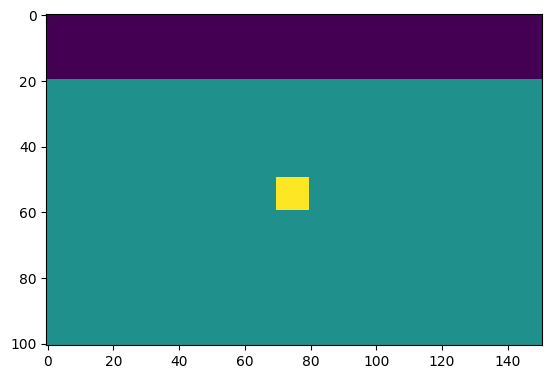

In [11]:
Nx = 151
Ny = 101
Nt = 3001
dt = 0.001
dx = 0.01
dy = 0.01

source_num = 16
receiver_num = 151
source_position = [[i*10,5] for i in range(source_num)]
print(source_position)
receiver_position = [[i,0] for i in range(receiver_num)]

pml_len = 40
pml_alpha = 20

source_fre = 5
source_center = 0.2

m = Mesh(Nx, Ny, dx, dy)
t = Time(Nt, dt)
a = Acquisition(source_num, source_position,
                receiver_num, receiver_position)

c = np.ones([Nx, Ny])
c[:,:20] = 0.8
c[70:80,50:60] = 1.2
rho = np.ones([Nx, Ny])

c_ref = np.ones([Nx, Ny])
c_ref[:,:20] = 0.8

model = ModelPML(m, t, c, rho, a, pml_len, pml_alpha)
model.WriteModel()

s = SourceData()
s.SetSource(source_num, Nt, dt, source_fre, source_center)
s.WriteSource()

print(model.source_position_pml)
print(model.receiver_position_pml)

plt.imshow(c.transpose())


In [12]:
model = ModelPML(m, t, c, rho, a, pml_len, pml_alpha)
model.WriteModel()

# solver
top = time.time()
os.system("./solver")
bottom = time.time()

print((bottom - top))

seis = ReadSeisMulti(model)

24.104493618011475


In [13]:
model = ModelPML(m, t, c_ref, rho, a, pml_len, pml_alpha)
model.WriteModel()

# solver
top = time.time()
os.system("./solver")
bottom = time.time()

print((bottom - top))

seis_ref = ReadSeisMulti(model)

24.2057204246521


In [14]:
def DispSeisSignal(seis_signal, model, source_idx=0, val=0.5):
    val = val * np.max(np.abs(seis_signal[source_idx]))
    aspect = (model.x[-1] - model.x[0]) / (model.t[-1] - model.t[0])
    plt.imshow(seis_signal[source_idx].transpose(), cmap="bwr", clim=[-val,val], 
               aspect=aspect, extent=(model.x[0],model.x[-1],model.t[-1],model.t[0]))
    plt.tight_layout()

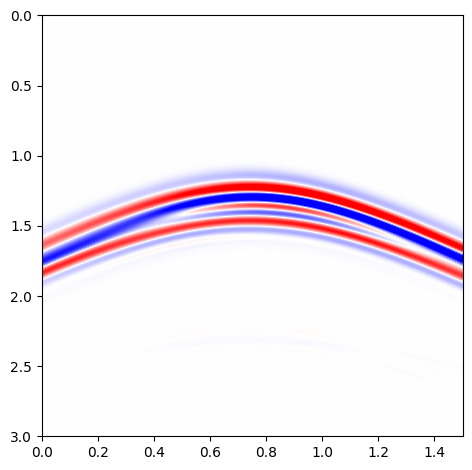

In [16]:
DispSeisSignal(seis - seis_ref, model, 6)